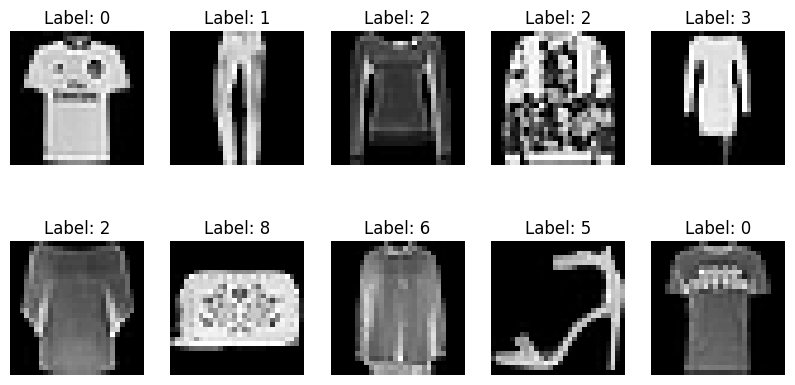

Training set shape: (6400, 784), Validation set shape: (1600, 784), Test set shape: (2000, 784)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

X_train = train_df.iloc[:8000, 1:].values
y_train = train_df.iloc[:8000, 0].values
X_test = test_df.iloc[:2000, 1:].values
y_test = test_df.iloc[:2000, 0].values

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

The best activation function on the test set is 'tanh' with accuracy 0.8305
Activation: logistic
Final Training Loss: 1.7392
Final Validation Loss: 1.7448
Test Accuracy: 0.4410
------------------------------
Activation: tanh
Final Training Loss: 0.4208
Final Validation Loss: 0.4653
Test Accuracy: 0.8305
------------------------------
Activation: relu
Final Training Loss: 0.4329
Final Validation Loss: 0.4764
Test Accuracy: 0.8220
------------------------------
Activation: identity
Final Training Loss: 0.4146
Final Validation Loss: 0.4776
Test Accuracy: 0.8225
------------------------------


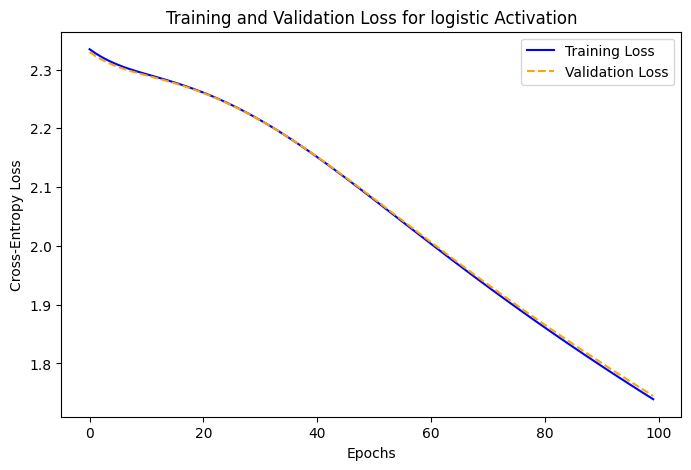

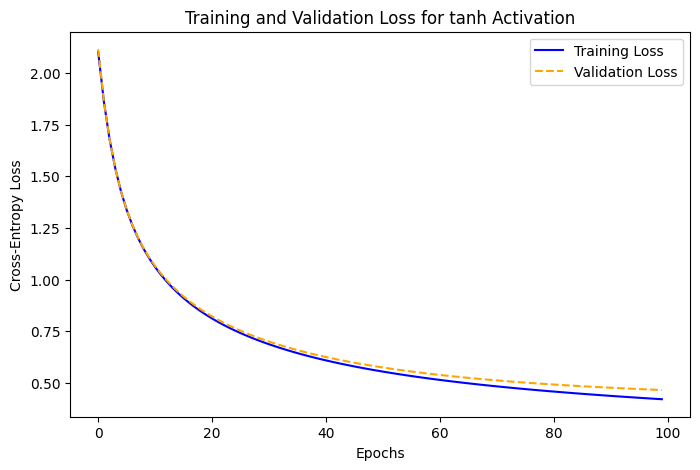

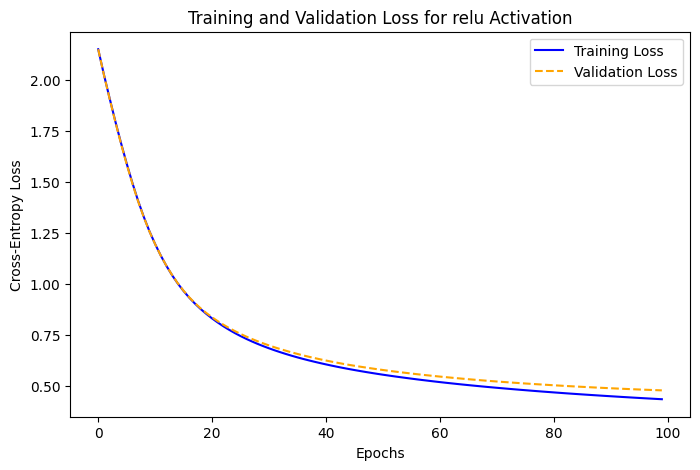

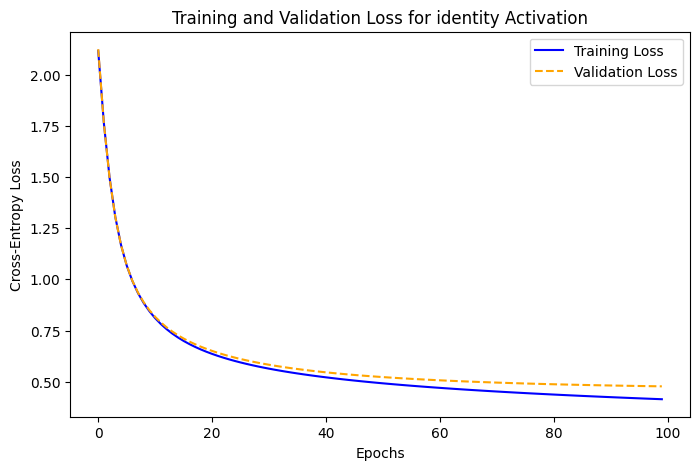

In [2]:
hidden_layers = [128, 64, 32]
max_iter = 100
batch_size = 128
learning_rate = 2e-5

activations = ['logistic', 'tanh', 'relu', 'identity']
training_losses = {}
validation_losses = {}
test_accuracies = {}

for activation in activations:
    model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation,
                          solver='adam', batch_size=batch_size, learning_rate_init=learning_rate,
                          max_iter=1, warm_start=True, random_state=42)  
    
    training_loss_list = []
    validation_loss_list = []
    
    for epoch in range(max_iter):
        model.fit(X_train, y_train)  
        
        train_preds = model.predict_proba(X_train)
        training_loss = log_loss(y_train, train_preds)
        training_loss_list.append(training_loss)  
        
        val_preds = model.predict_proba(X_val)  
        validation_loss = log_loss(y_val, val_preds)  
        validation_loss_list.append(validation_loss) 

    training_losses[activation] = training_loss_list
    validation_losses[activation] = validation_loss_list
    test_accuracy = model.score(X_test, y_test)
    test_accuracies[activation] = test_accuracy

best_activation = max(test_accuracies, key=test_accuracies.get)
print(f"The best activation function on the test set is '{best_activation}' with accuracy {test_accuracies[best_activation]:.4f}")

for activation in activations:
    final_training_loss = training_losses[activation][-1]
    final_validation_loss = validation_losses[activation][-1]
    print(f"Activation: {activation}")
    print(f"Final Training Loss: {final_training_loss:.4f}")
    print(f"Final Validation Loss: {final_validation_loss:.4f}")
    print(f"Test Accuracy: {test_accuracies[activation]:.4f}")
    print("-" * 30)

for activation in activations:
    plt.figure(figsize=(8, 5))
    plt.plot(training_losses[activation], label='Training Loss', color='blue')
    plt.plot(validation_losses[activation], '--', label='Validation Loss', color='orange')
    plt.xlabel("Epochs")
    plt.ylabel("Cross-Entropy Loss")
    plt.title(f"Training and Validation Loss for {activation} Activation")
    plt.legend()
    plt.show()


In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [1e-4, 1e-5, 1e-6],
    'batch_size': [64, 128, 256]
}

model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=best_activation, 
                      max_iter=100, random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters from grid search:", best_params)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters from grid search: {'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
from sklearn.neural_network import MLPClassifier

best_params = {
    'hidden_layer_sizes': [128, 64, 32],
    'activation': 'tanh',
    'solver': 'adam',
    'batch_size': 128,
    'learning_rate_init': 0.0001,
    'max_iter': 100
}

best_mlp_model = MLPClassifier(**best_params, random_state=42)
best_mlp_model.fit(X_train, y_train)

train_accuracy = best_mlp_model.score(X_train, y_train)
val_accuracy = best_mlp_model.score(X_val, y_val)
test_accuracy = best_mlp_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9497
Validation Accuracy: 0.8544
Test Accuracy: 0.8395


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization


Activation: relu
Final Training Loss (MSE): 0.0137
Final Validation Loss (MSE): 0.0270
Final Test Loss (MSE): 0.0274


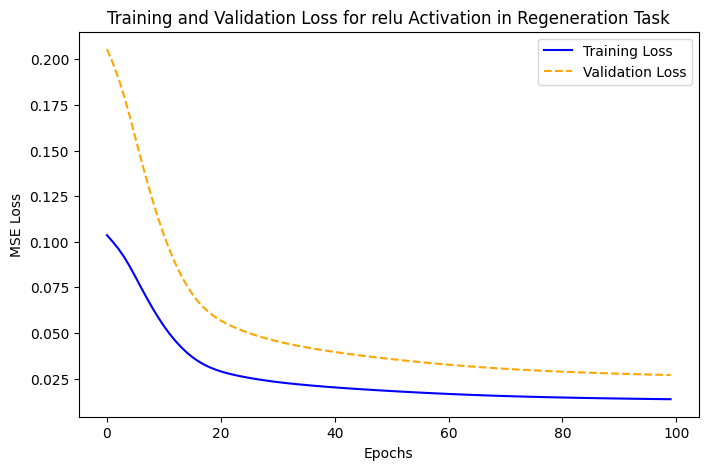

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization


Activation: identity
Final Training Loss (MSE): 0.0120
Final Validation Loss (MSE): 0.0236
Final Test Loss (MSE): 0.0240


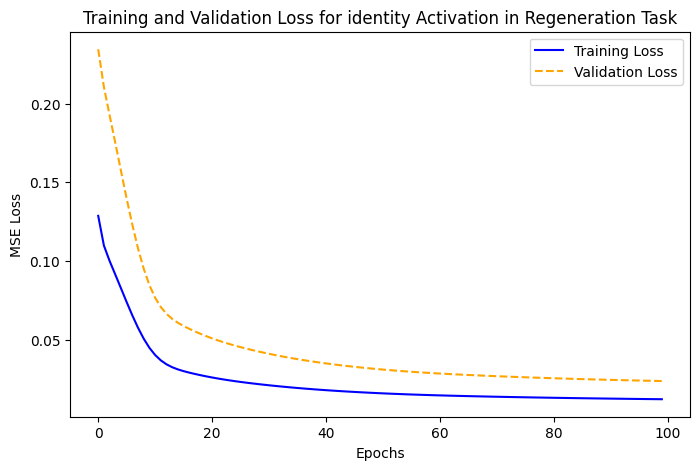

In [ ]:
from sklearn.neural_network import MLPRegressor
import numpy as np

a = 64
b = 128
c = 256

hidden_layer_sizes = [c, b, a, b, c]
activation_functions = ['relu', 'identity']
results = {}

# Training with ReLU activation function
mlp_relu = MLPRegressor(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=1,  # Train one epoch at a time
    warm_start=True,  # Keep weights for incremental training
    random_state=42
)

relu_train_loss = []
relu_val_loss = []

print('Training with ReLU activation function...')
for epoch in range(100):
    mlp_relu.fit(X_train, X_train) 
    relu_train_loss.append(mlp_relu.loss_curve_[-1])

    val_predictions = mlp_relu.predict(X_val)  
    epoch_val_loss = np.mean((val_predictions - X_val) ** 2)  # Mean Squared Error
    relu_val_loss.append(epoch_val_loss)
    
    print(f'Epoch: {epoch + 1} - Val Loss: {epoch_val_loss}')

# Training with Identity activation function
mlp_identity = MLPRegressor(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='identity',
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=1,  # Train one epoch at a time
    warm_start=True,  # Keep weights for incremental training
    random_state=42
)

identity_train_loss = []
identity_val_loss = []

print('\nTraining with Identity activation function...')
for epoch in range(100):
    mlp_identity.fit(X_train, X_train)  # Use the images as both input and target
    identity_train_loss.append(mlp_identity.loss_curve_[-1])

    val_predictions = mlp_identity.predict(X_val)  # Output will have the same shape as X_val
    epoch_val_loss = np.mean((val_predictions - X_val) ** 2)  # Mean Squared Error
    identity_val_loss.append(epoch_val_loss)

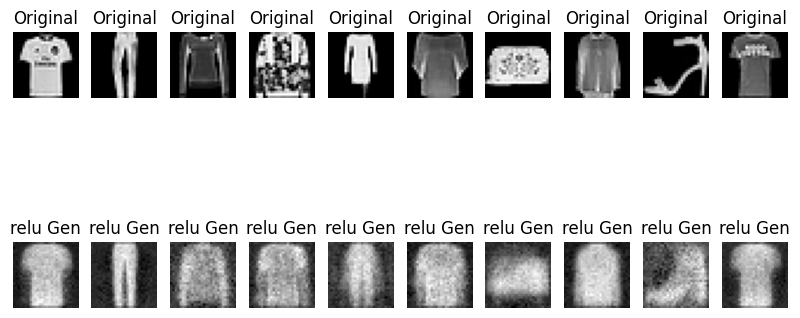

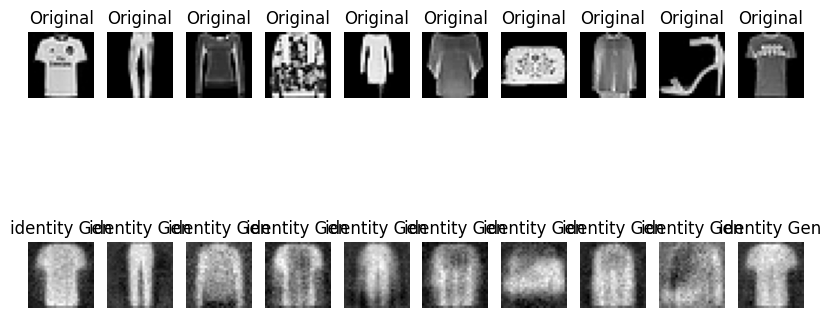

In [ ]:
test_samples = X_test[:10]
for activation in ['relu', 'identity']:
    regressor = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, 
                             solver='adam', learning_rate_init=2e-5, max_iter=max_iter, 
                             random_state=42)
    regressor.fit(X_train, X_train) 
    
    regenerated_images = regressor.predict(test_samples)  
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(test_samples[i].reshape(28, 28), cmap="gray")
        plt.title("Original")
        plt.axis('off')
        
        plt.subplot(2, 10, i + 11)
        plt.imshow(regenerated_images[i].reshape(28, 28), cmap="gray")
        plt.title(f"{activation} Gen")
        plt.axis('off')
    plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

def extract_feature_vector(model, data, function, layer_index=2):
    activations = data
    for i in range(layer_index + 1):
        activations = activations @ model.coefs_[i] + model.intercepts_[i]
        if function == 'relu':
            activations = np.maximum(activations, 0)
    return activations

# Extract feature vectors of size `a` for training and validation sets
relu_train_features = extract_feature_vector(mlp_relu, X_train, function='relu')
relu_test_features = extract_feature_vector(mlp_relu, X_test, function='relu')

identity_train_features = extract_feature_vector(mlp_identity, X_train, function='identity')
identity_test_features = extract_feature_vector(mlp_identity, X_test, function='identity') 

# Train smaller MLP classifiers with extracted features
mlp_classifier_relu = MLPClassifier(
    hidden_layer_sizes=(a, a),
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=200,
    random_state=42
)

mlp_classifier_identity = MLPClassifier(
    hidden_layer_sizes=(a, a),
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=200,
    random_state=42
)

# Fit the classifiers on the ReLU features
mlp_classifier_relu.fit(relu_train_features, y_train)
relu_predictions = mlp_classifier_relu.predict(relu_test_features)
relu_accuracy = accuracy_score(y_test, relu_predictions)

# Fit the classifiers on the identity features
mlp_classifier_identity.fit(identity_train_features, y_train)
identity_predictions = mlp_classifier_identity.predict(identity_test_features)
identity_accuracy = accuracy_score(y_test, identity_predictions)

print("Test accuracy for smaller MLP Classifier 1:", relu_accuracy)
print("Test accuracy for smaller MLP Classifier 2:", identity_accuracy)


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy for smaller MLP Classifier 1: 0.7435
Test accuracy for smaller MLP Classifier 2: 0.7435


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
